In [1]:
from citipy import citipy as cp
import pandas as pd
import matplotlib.pyplot as plt
import random as random
import json
import requests
from config import api_key

In [2]:
### Function definitions ###

# FUNCTION -- Generates random lat/long values and finds the nearest cities
def randCity(num_cities):
    
    rand_list = []
    
    while len(rand_list) < num_cities:
        rand_long = random.uniform(-180,180)
        rand_lat = random.uniform(-90,90)
        city = cp.nearest_city(rand_lat, rand_long)
        
        # Adds city to list if not already present
        if city.city_name.title() not in rand_list:
            rand_list.append(city.city_name.title())

    return rand_list

In [7]:
url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=metric&q='

# Gets a list of random cities
city_list = randCity(500)

name = []
lat = []
temp = []
humid = []
clouds = []
wind = []

i = 0

# Queries openweathermap.org for weather conditions and official latitudes (rather than random numbers)
while i < len(city_list):
    
    response = requests.get(url + city_list[i]).json()
    
    # Updates lists when values are found, otherwise pulls a new random city into the city_list
    try:
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        temp.append(response["main"]["temp"])
        humid.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        i += 1
        
    # Provides user feedback when a query is unsuccessful and how many remain
    except:
        print(f"Unsuccessful query: {city_list[i]}.")
        new_city = randCity(1)
        city_list.append(new_city[0])
        print(f"Adding {city_list[-1]} to the list.")
        print(f"{len(city_list)-len(name)} queries remaining.\n")
        i += 1
        continue

# Provides user feedback for total number successfully queried
print(f"{len(city_list)} cities queried, {len(name)} succeeded.")

Unsuccessful query: Taolanaro.
Adding Vagay to the list.
471 queries remaining.

Unsuccessful query: Suao.
Adding Chuy to the list.
464 queries remaining.

Unsuccessful query: Vaitupu.
Adding Thompson to the list.
454 queries remaining.

Unsuccessful query: Attawapiskat.
Adding Busselton to the list.
454 queries remaining.

Unsuccessful query: Ha.
Adding Rikitea to the list.
437 queries remaining.

Unsuccessful query: Barentsburg.
Adding Jamestown to the list.
432 queries remaining.

Unsuccessful query: Illoqqortoormiut.
Adding Tuktoyaktuk to the list.
430 queries remaining.

Unsuccessful query: Of.
Adding Longyearbyen to the list.
429 queries remaining.

Unsuccessful query: Ruatoria.
Adding Barrow to the list.
400 queries remaining.

Unsuccessful query: Saleaula.
Adding Rikitea to the list.
386 queries remaining.

Unsuccessful query: Belushya Guba.
Adding Chokurdakh to the list.
371 queries remaining.

Unsuccessful query: Tsihombe.
Adding Rikitea to the list.
367 queries remaining.

U

In [15]:
weather_df = pd.DataFrame({
    "City":name,
    "Lat":lat,
    "Temperature":temp,
    "Humidity":humid,
    "Cloud Coverage":clouds,
    "Wind Speed":wind
})

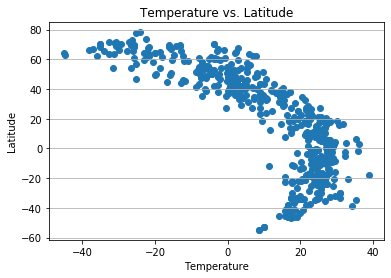

In [16]:
plt.scatter(weather_df["Temperature"], weather_df["Lat"])

plt.ylabel("Latitude")
plt.xlabel("Temperature")
plt.title("Temperature vs. Latitude")
plt.grid(axis="y")

plt.show()

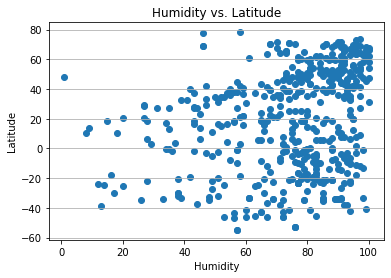

In [17]:
plt.scatter(weather_df["Humidity"], weather_df["Lat"])

plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.title("Humidity vs. Latitude")
plt.grid(axis="y")

plt.show()

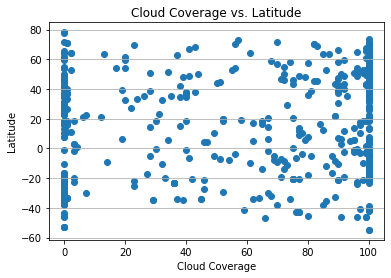

In [18]:
plt.scatter(weather_df["Cloud Coverage"], weather_df["Lat"])

plt.ylabel("Latitude")
plt.xlabel("Cloud Coverage")
plt.title("Cloud Coverage vs. Latitude")
plt.grid(axis="y")

plt.show()

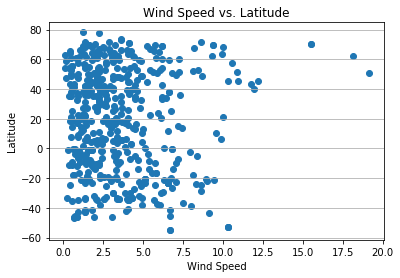

In [19]:
plt.scatter(weather_df["Wind Speed"], weather_df["Lat"])

plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.title("Wind Speed vs. Latitude")
plt.grid(axis="y")

plt.show()